<a id="1"></a>
# <p style="padding:10px;background-color:green;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Surprise Housing House Price Prediction - Advanced regression</p>

# `Problem Statement:`

Surprise Housing, a US-based company, is venturing into the Australian housing market and aims to leverage data analytics to purchase properties below their actual values and sell them for a profit. They have gathered a dataset from Australian house sales and need a regression model with regularization to predict the actual value of prospective properties. The company seeks insights into:

`Significant Variables:` Identify the variables that play a crucial role in predicting house prices.

`Model Performance:` Assess how well the chosen variables describe the price of a house.

`Optimal Regularization:` Determine the optimal values of lambda for Ridge and Lasso regression to enhance the model's predictive accuracy.

`Business Goal:`

The primary objective is to create a robust regression model that accurately predicts house prices based on independent variables. This model will assist the management in understanding the dynamics of pricing in the Australian market. Insights derived from the model can guide strategic decisions, helping the company focus on areas with high return potential and adapt its business strategy accordingly.

`Tasks:`

1. Build a regression model with regularization (Ridge and Lasso) using the provided dataset.

2. Identify significant variables influencing house prices.

3. Evaluate the model's performance in describing house prices.

4. Determine the optimal values of lambda for Ridge and Lasso regression.

5. Provide insights to help Surprise Housing make informed decisions in entering the Australian housing market.





In [1]:
#Importing all necessary library
# Pandas for Data Frame 
import pandas as pd
# Numpy for advance math operation
import numpy as np
# filtering warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading CSV file
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns',81)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
#The info() method provides a concise summary of a DataFrame, displaying information
# such as the number of entries, data types, and memory usage, aiding data exploration and analysis.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#shape of data
df.shape

(1460, 81)

In [5]:
#The describe() function offers a concise statistical summary.
#It provides count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, 
#and maximum values for numeric data in a DataFrame.
pd.set_option('display.max_columns',81)
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
#This function, "Missing_Values," analyzes a DataFrame's columns, collecting data on variable names,
#data types, total values, missing values, and unique values. It returns a sorted summary of missing data.
def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "Total_Value":total_value,\
                               "Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("Total_Missing_Value",ascending=False)

In [7]:
pd.set_option('display.max_rows',81)
Missing_Values(df)

Total_Value  Total_Missing_Value  %_Missing_Value_Rate  \
Variable                                                                
PoolQC                1460                 1453                0.9952   
MiscFeature           1460                 1406                0.9630   
Alley                 1460                 1369                0.9377   
Fence                 1460                 1179                0.8075   
FireplaceQu           1460                  690                0.4726   
LotFrontage           1460                  259                0.1774   
GarageYrBlt           1460                   81                0.0555   
GarageCond            1460                   81                0.0555   
GarageType            1460                   81                0.0555   
GarageFinish          1460                   81                0.0555   
GarageQual            1460                   81                0.0555   
BsmtFinType2          1460                   38                0.0260   
BsmtExposure          1460                   38                0.0260   
BsmtQual              1460                   37                0.0253   
BsmtCond              1460                   37                0.0253   
BsmtFinType1          1460                   37                0.0253   
MasVnrArea            1460                    8                0.0055   
MasVnrType            1460                    8                0.0055   
Electrical            1460                    1                0.0007   
Id                    1460                    0                0.0000   
Functional            1460                    0                0.0000   
Fireplaces            1460                    0                0.0000   
KitchenQual           1460                    0                0.0000   
KitchenAbvGr          1460                    0                0.0000   
BedroomAbvGr          1460                    0                0.0000   
HalfBath              1460                    0                0.0000   
FullBath              1460                    0                0.0000   
BsmtHalfBath          1460                    0                0.0000   
TotRmsAbvGrd          1460                    0                0.0000   
GarageCars            1460                    0                0.0000   
GrLivArea             1460                    0                0.0000   
GarageArea            1460                    0                0.0000   
PavedDrive            1460                    0                0.0000   
WoodDeckSF            1460                    0                0.0000   
OpenPorchSF           1460                    0                0.0000   
EnclosedPorch         1460                    0                0.0000   
3SsnPorch             1460                    0                0.0000   
ScreenPorch           1460                    0                0.0000   
PoolArea              1460                    0                0.0000   
MiscVal               1460                    0                0.0000   
MoSold                1460                    0                0.0000   
YrSold                1460                    0                0.0000   
SaleType              1460                    0                0.0000   
SaleCondition         1460                    0                0.0000   
BsmtFullBath          1460                    0                0.0000   
HeatingQC             1460                    0                0.0000   
LowQualFinSF          1460                    0                0.0000   
LandSlope             1460                    0                0.0000   
OverallQual           1460                    0                0.0000   
HouseStyle            1460                    0                0.0000   
BldgType              1460                    0                0.0000   
Condition2            1460                    0                0.0000   
Condition1            1460                    0                0.0000   


`Summary:`

There are 1460 rows and 81 columns in dataframe
These 81 columns comprises of both dimensions (categorical value) and measures (numeric value)
The dataset is not clean, i.e. consists of missing values as well

In [8]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

In [9]:
# Removing identifier field
df.drop(['Id'], axis=1, inplace=True)

In [10]:
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    df[i].fillna("none", inplace=True)

In [11]:
Missing_Values(df)

Total_Value  Total_Missing_Value  %_Missing_Value_Rate  \
Variable                                                                
LotFrontage           1460                  259                0.1774   
GarageYrBlt           1460                   81                0.0555   
MasVnrArea            1460                    8                0.0055   
Electrical            1460                    1                0.0007   
KitchenAbvGr          1460                    0                0.0000   
GarageType            1460                    0                0.0000   
FireplaceQu           1460                    0                0.0000   
Fireplaces            1460                    0                0.0000   
Functional            1460                    0                0.0000   
TotRmsAbvGrd          1460                    0                0.0000   
KitchenQual           1460                    0                0.0000   
MSSubClass            1460                    0                0.0000   
GarageFinish          1460                    0                0.0000   
HalfBath              1460                    0                0.0000   
FullBath              1460                    0                0.0000   
BsmtHalfBath          1460                    0                0.0000   
BsmtFullBath          1460                    0                0.0000   
GrLivArea             1460                    0                0.0000   
LowQualFinSF          1460                    0                0.0000   
2ndFlrSF              1460                    0                0.0000   
BedroomAbvGr          1460                    0                0.0000   
GarageArea            1460                    0                0.0000   
GarageCars            1460                    0                0.0000   
PoolQC                1460                    0                0.0000   
SaleCondition         1460                    0                0.0000   
SaleType              1460                    0                0.0000   
YrSold                1460                    0                0.0000   
MoSold                1460                    0                0.0000   
MiscVal               1460                    0                0.0000   
MiscFeature           1460                    0                0.0000   
Fence                 1460                    0                0.0000   
PoolArea              1460                    0                0.0000   
GarageQual            1460                    0                0.0000   
ScreenPorch           1460                    0                0.0000   
3SsnPorch             1460                    0                0.0000   
EnclosedPorch         1460                    0                0.0000   
OpenPorchSF           1460                    0                0.0000   
WoodDeckSF            1460                    0                0.0000   
PavedDrive            1460                    0                0.0000   
GarageCond            1460                    0                0.0000   
1stFlrSF              1460                    0                0.0000   
CentralAir            1460                    0                0.0000   
MSZoning              1460                    0                0.0000   
Neighborhood          1460                    0                0.0000   
YearBuilt             1460                    0                0.0000   
OverallCond           1460                    0                0.0000   
OverallQual           1460                    0                0.0000   
HouseStyle            1460                    0                0.0000   
BldgType              1460                    0                0.0000   
Condition2            1460                    0                0.0000   
Condition1            1460                    0                0.0000   
LandSlope             1460                    0                0.0000   
HeatingQC             1460                    0                0.0000   


In [12]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df.dropna(subset=["Electrical"], inplace=True, axis=0)

In [13]:
Missing_Values(df)

Total_Value  Total_Missing_Value  %_Missing_Value_Rate  \
Variable                                                                
MSSubClass            1459                    0                   0.0   
MSZoning              1459                    0                   0.0   
GarageYrBlt           1459                    0                   0.0   
GarageType            1459                    0                   0.0   
FireplaceQu           1459                    0                   0.0   
Fireplaces            1459                    0                   0.0   
Functional            1459                    0                   0.0   
TotRmsAbvGrd          1459                    0                   0.0   
KitchenQual           1459                    0                   0.0   
KitchenAbvGr          1459                    0                   0.0   
BedroomAbvGr          1459                    0                   0.0   
HalfBath              1459                    0                   0.0   
FullBath              1459                    0                   0.0   
BsmtHalfBath          1459                    0                   0.0   
BsmtFullBath          1459                    0                   0.0   
GrLivArea             1459                    0                   0.0   
LowQualFinSF          1459                    0                   0.0   
2ndFlrSF              1459                    0                   0.0   
1stFlrSF              1459                    0                   0.0   
GarageFinish          1459                    0                   0.0   
GarageCars            1459                    0                   0.0   
GarageArea            1459                    0                   0.0   
PoolQC                1459                    0                   0.0   
SaleCondition         1459                    0                   0.0   
SaleType              1459                    0                   0.0   
YrSold                1459                    0                   0.0   
MoSold                1459                    0                   0.0   
MiscVal               1459                    0                   0.0   
MiscFeature           1459                    0                   0.0   
Fence                 1459                    0                   0.0   
PoolArea              1459                    0                   0.0   
GarageQual            1459                    0                   0.0   
ScreenPorch           1459                    0                   0.0   
3SsnPorch             1459                    0                   0.0   
EnclosedPorch         1459                    0                   0.0   
OpenPorchSF           1459                    0                   0.0   
WoodDeckSF            1459                    0                   0.0   
PavedDrive            1459                    0                   0.0   
GarageCond            1459                    0                   0.0   
Electrical            1459                    0                   0.0   
CentralAir            1459                    0                   0.0   
HeatingQC             1459                    0                   0.0   
LandSlope             1459                    0                   0.0   
OverallCond           1459                    0                   0.0   
OverallQual           1459                    0                   0.0   
HouseStyle            1459                    0                   0.0   
BldgType              1459                    0                   0.0   
Condition2            1459                    0                   0.0   
Condition1            1459                    0                   0.0   
Neighborhood          1459                    0                   0.0   
LotConfig             1459                    0                   0.0   
YearRemodAdd          1459                    0                   0.0   
Utilities             1459                    0                   0.0   


<a id="1"></a>
# <p style="padding:10px;background-color:green;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Univariate</p>


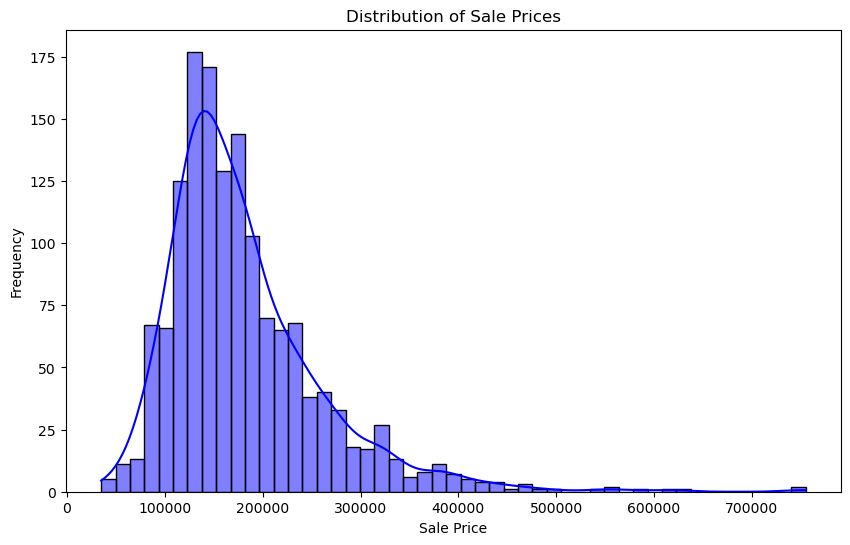

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


`Histogram for SalePrice:`
Use a histogram to visualize the distribution of house prices.
This will give an overview of the range and frequency of sale prices.

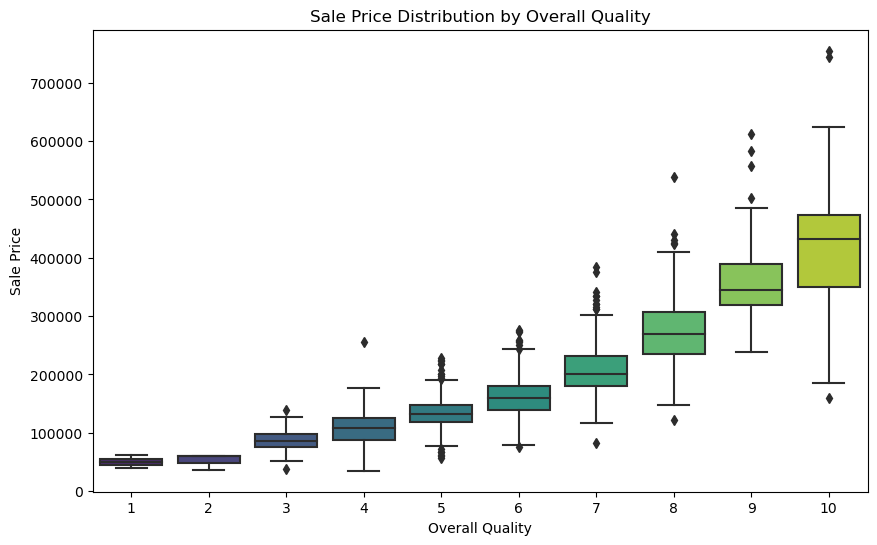

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='viridis')
plt.title('Sale Price Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()


`Boxplot for OverallQual:`
Create a boxplot to understand the distribution of overall quality ratings.
Identify any outliers and understand the spread of quality ratings.

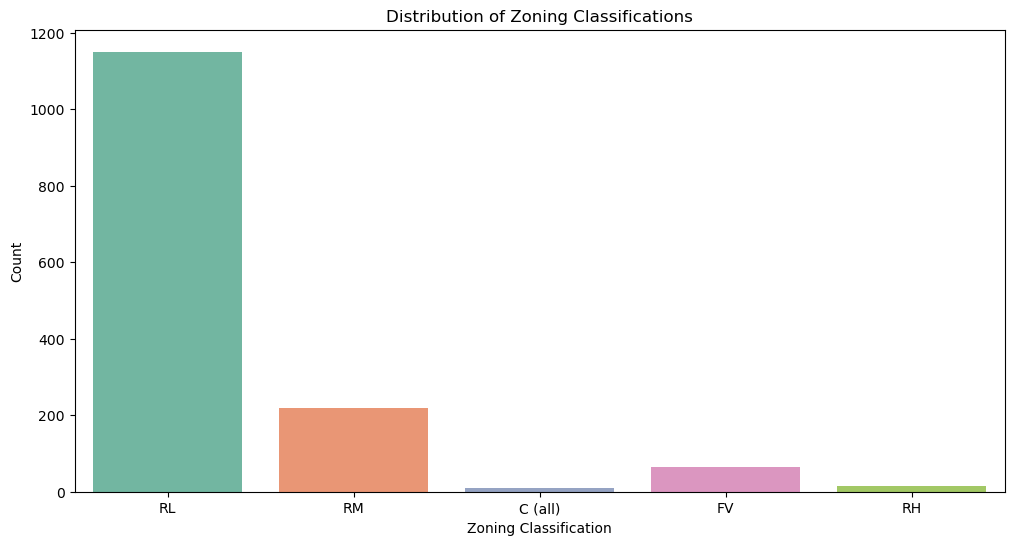

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MSZoning', data=df, palette='Set2')
plt.title('Distribution of Zoning Classifications')
plt.xlabel('Zoning Classification')
plt.ylabel('Count')
plt.show()


`Barplot for MSZoning:`

Use a barplot to display the distribution of different zoning classifications.
Understand the prevalence of each zoning type.

MSZoning: Identifies the general zoning classification of the sale.\

       A	Agricultur
       C	Commercia
       FV	Floating Village Residential\
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

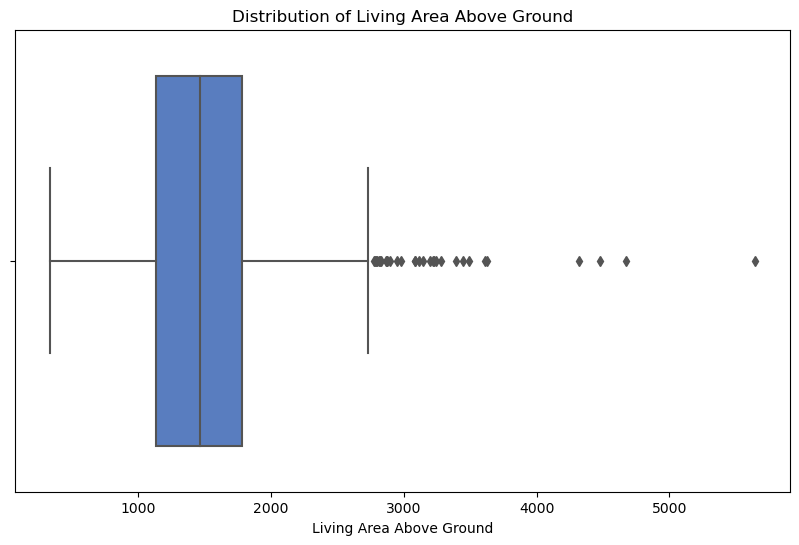

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GrLivArea', data=df, palette='muted')
plt.title('Distribution of Living Area Above Ground')
plt.xlabel('Living Area Above Ground')
plt.show()

`Boxplot for GrLivArea:`

Create a boxplot to visualize the distribution of living area above ground.
Identify any outliers and understand their impact on sale prices.

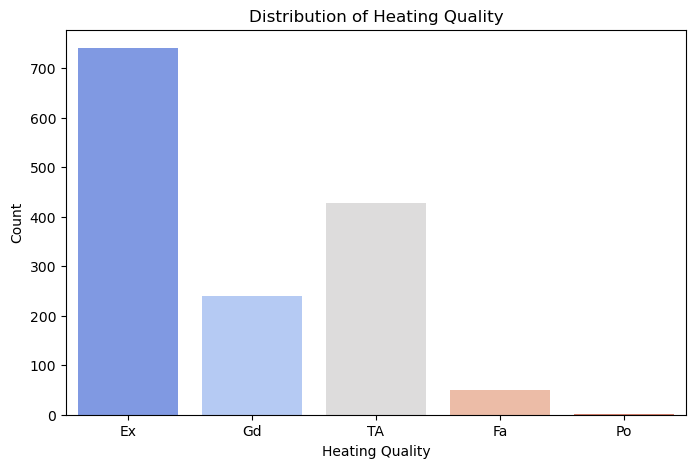

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='HeatingQC', data=df, palette='coolwarm')
plt.title('Distribution of Heating Quality')
plt.xlabel('Heating Quality')
plt.ylabel('Count')
plt.show()


`Countplot for HeatingQC:`

Use a countplot to show the distribution of heating quality ratings.
Understand the frequency of different heating quality levels.

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor


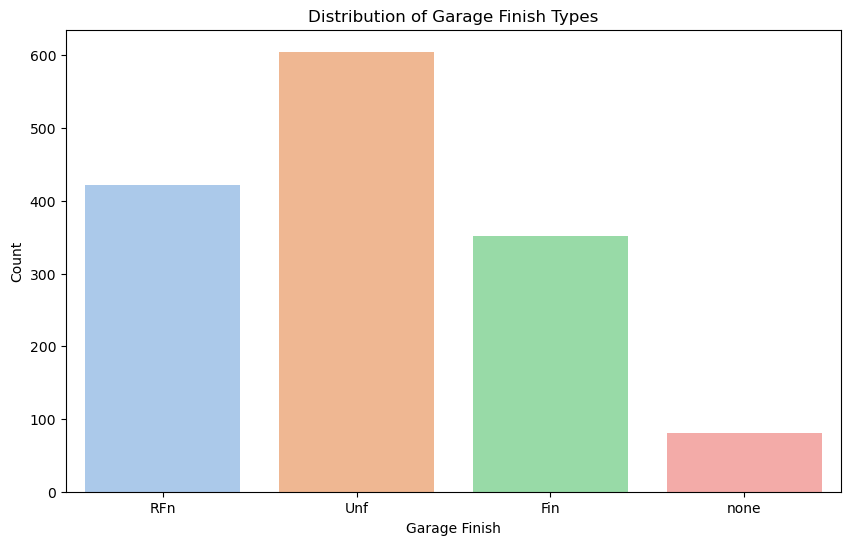

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GarageFinish', data=df, palette='pastel')
plt.title('Distribution of Garage Finish Types')
plt.xlabel('Garage Finish')
plt.ylabel('Count')
plt.show()


`Barplot for GarageFinish:`

Create a barplot to display the distribution of garage finishing types.
Understand the prevalence of different garage finish categories.
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

<a id="1"></a>
# <p style="padding:10px;background-color:pink;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Bivariate</p>


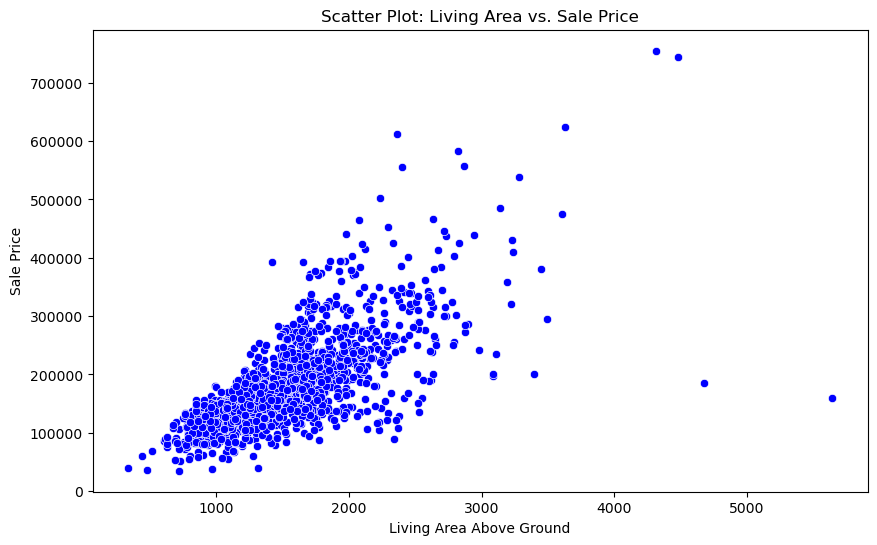

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, color='blue')
plt.title('Scatter Plot: Living Area vs. Sale Price')
plt.xlabel('Living Area Above Ground')
plt.ylabel('Sale Price')
plt.show()

`Scatter Plot between GrLivArea and SalePrice:`

Using a scatter plot to visualize the relationship between the living area above ground (GrLivArea) and the sale price (SalePrice).
Look for patterns to understand how the size of the living area correlates with house prices.

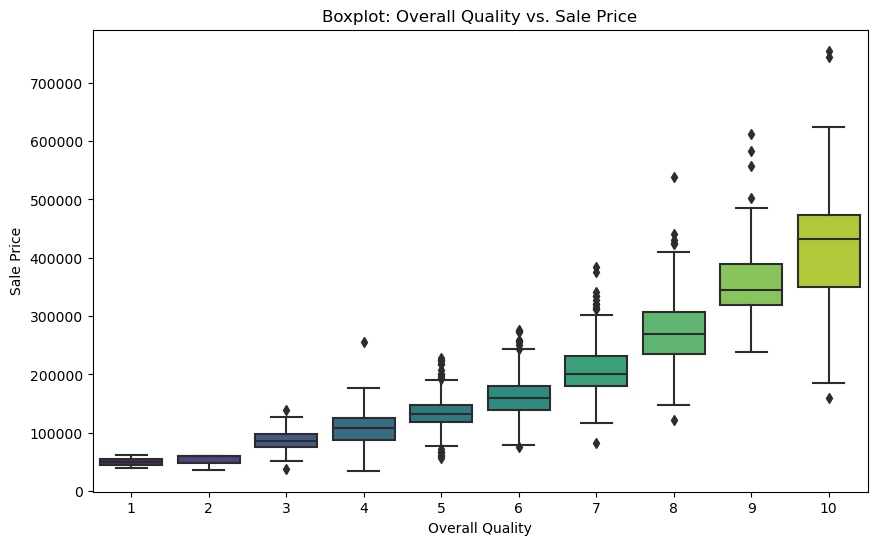

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='viridis')
plt.title('Boxplot: Overall Quality vs. Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

`Boxplot between OverallQual and SalePrice:`

Creating a boxplot to show how the overall quality rating (OverallQual) is related to house prices (SalePrice).
Observe how the distribution of sale prices varies across different quality levels

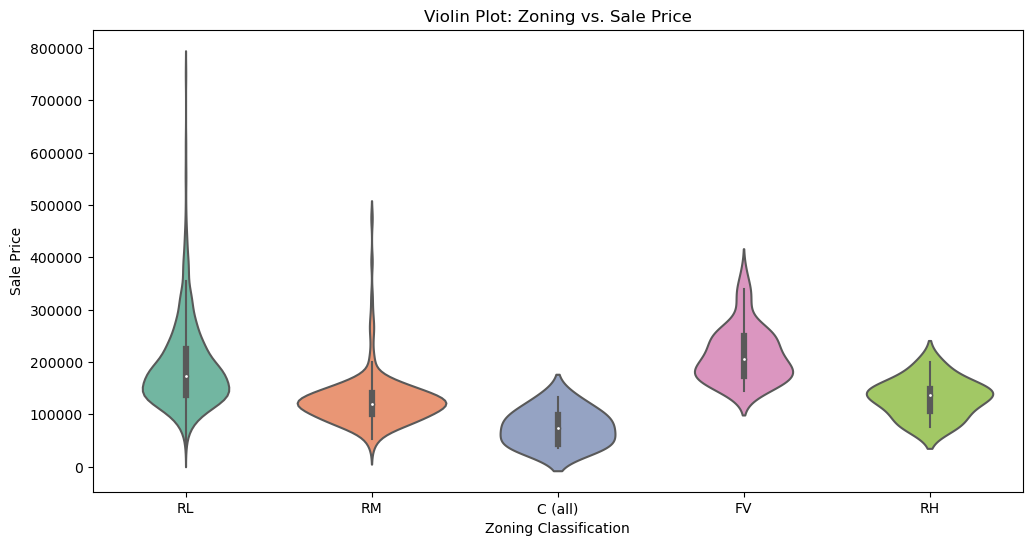

In [22]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='MSZoning', y='SalePrice', data=df, palette='Set2')
plt.title('Violin Plot: Zoning vs. Sale Price')
plt.xlabel('Zoning Classification')
plt.ylabel('Sale Price')
plt.show()


`Violin Plot between MSZoning and SalePrice:`

Utilize a violin plot to depict the distribution of house prices (SalePrice) across different zoning classifications (MSZoning).
Understand the spread of sale prices within each zoning category.

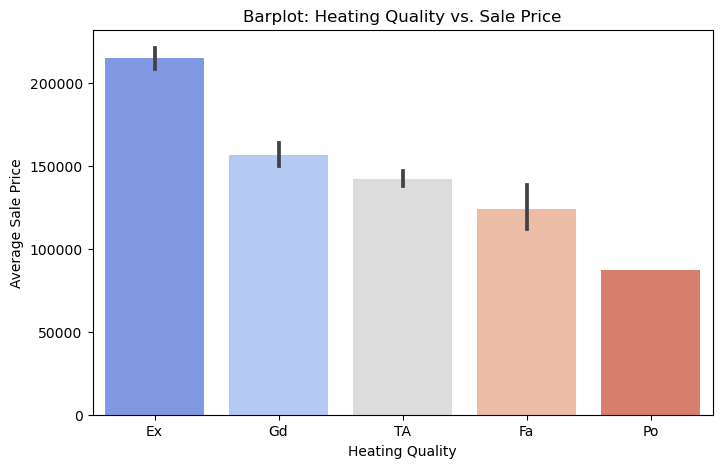

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x='HeatingQC', y='SalePrice', data=df, palette='coolwarm')
plt.title('Barplot: Heating Quality vs. Sale Price')
plt.xlabel('Heating Quality')
plt.ylabel('Average Sale Price')
plt.show()

`Barplot between HeatingQC and SalePrice:`

Creating a barplot to illustrate the average sale prices for each heating quality rating (HeatingQC).
Observe how heating quality impacts the average sale price.

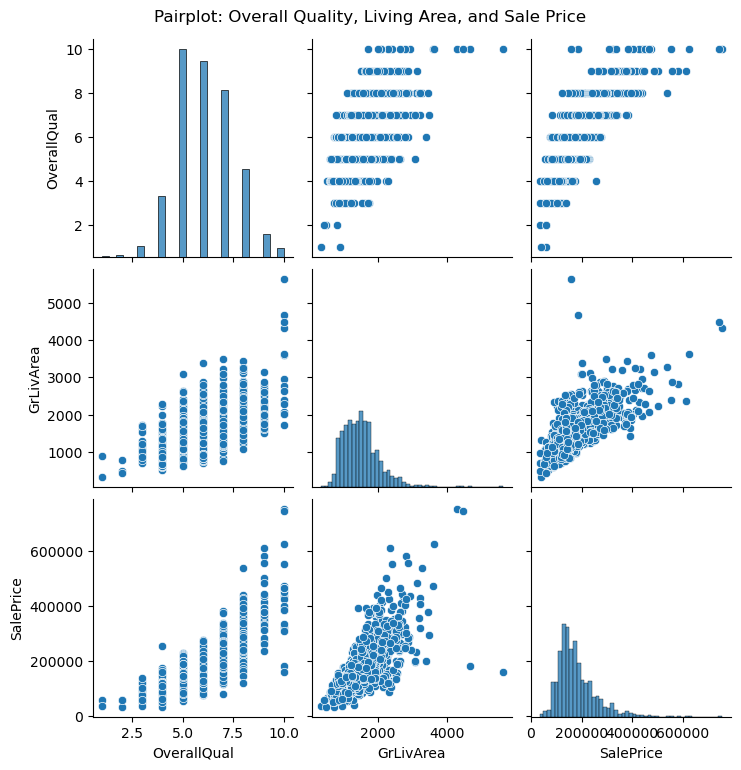

In [24]:
sns.pairplot(df[['OverallQual', 'GrLivArea', 'SalePrice']])
plt.suptitle('Pairplot: Overall Quality, Living Area, and Sale Price', y=1.02)
plt.show()

`Pairplot between OverallQual, GrLivArea, and SalePrice:`

Using a pairplot to visualize pairwise relationships between overall quality (OverallQual), living area above ground (GrLivArea), and sale price (SalePrice).
Identify patterns and correlations between these important variables.

<a id="1"></a>
# <p style="padding:10px;background-color:purple;margin:0;color:bule;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Multivariate Analysis </p>


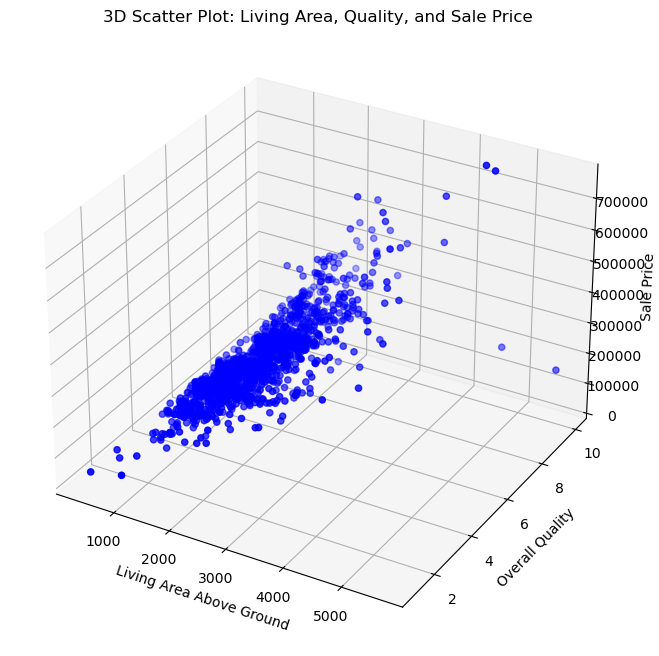

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['GrLivArea'], df['OverallQual'], df['SalePrice'], c='blue', marker='o')
ax.set_xlabel('Living Area Above Ground')
ax.set_ylabel('Overall Quality')
ax.set_zlabel('Sale Price')
ax.set_title('3D Scatter Plot: Living Area, Quality, and Sale Price')

plt.show()


`3D Scatter Plot between GrLivArea, OverallQual, and SalePrice:`

Creating a 3D scatter plot to visualize the relationship between living area above ground (GrLivArea), overall quality (OverallQual), and sale price (SalePrice).
Observe how the interaction of these variables collectively influences house prices.

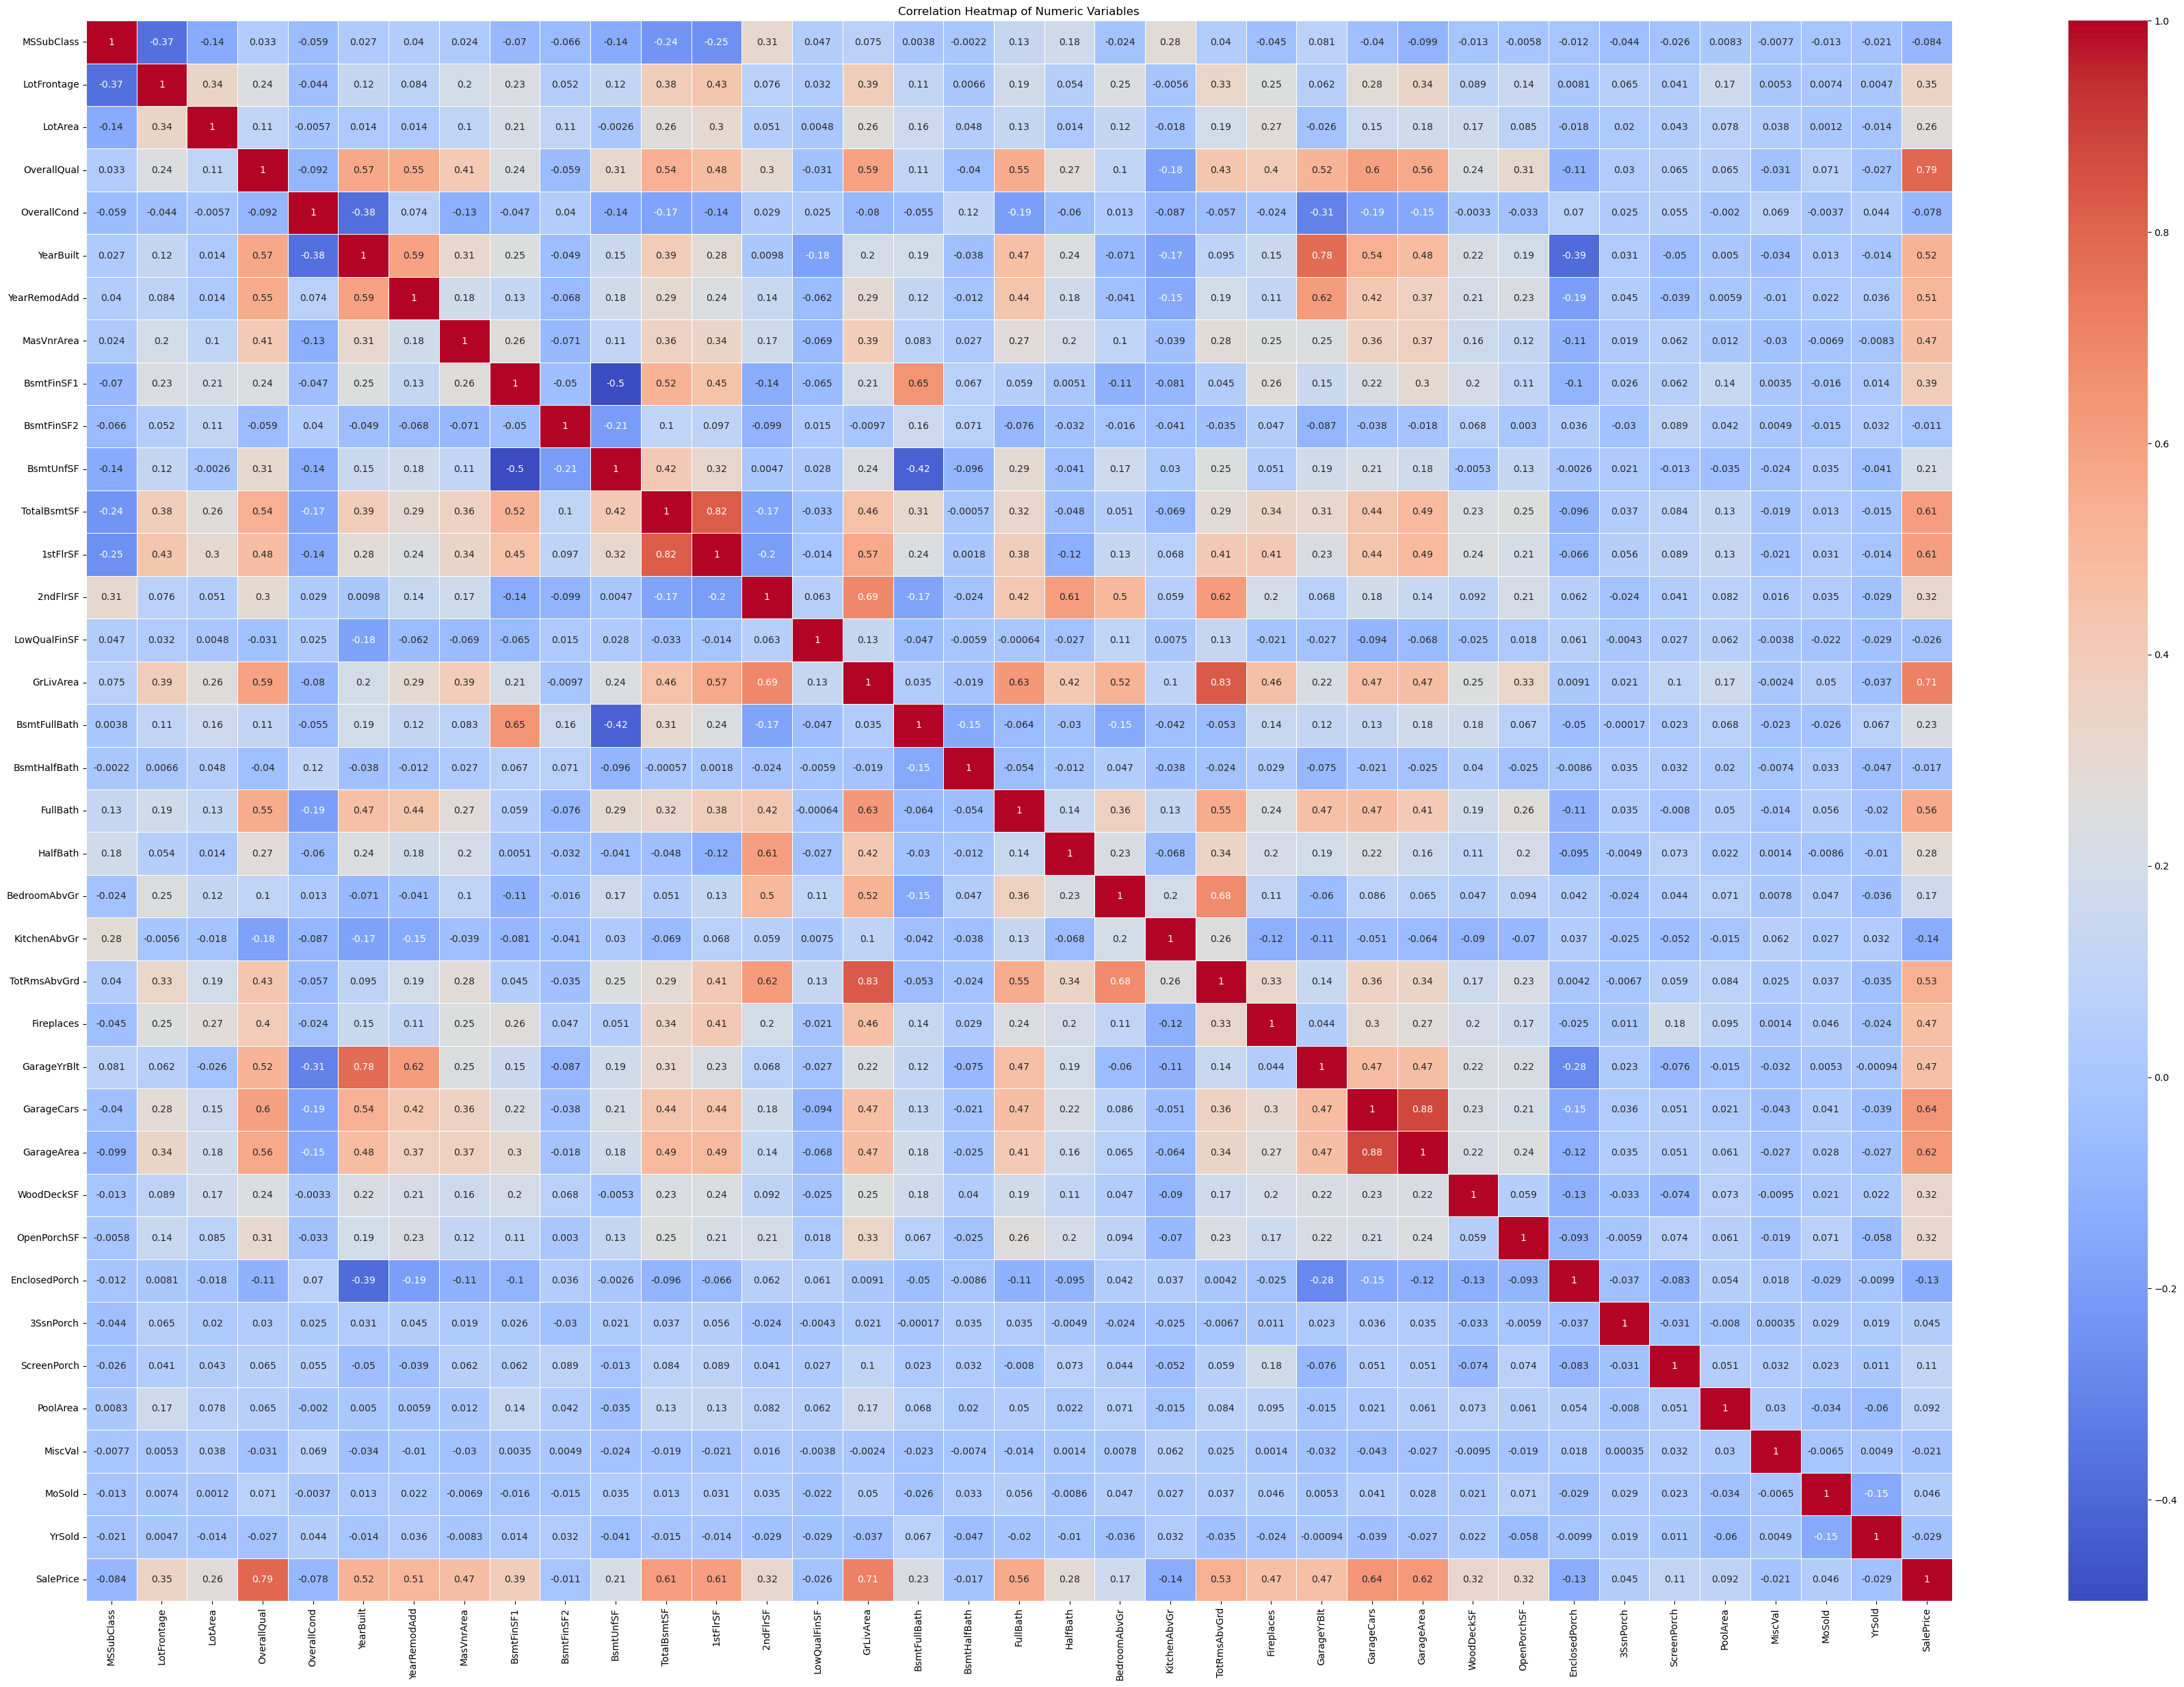

In [26]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(44, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

`heatmap of Correlations between Numeric Variables:`

Generate a heatmap to visualize the correlation matrix between numeric variables.
Identify strong correlations, providing insights into which variables are closely related.

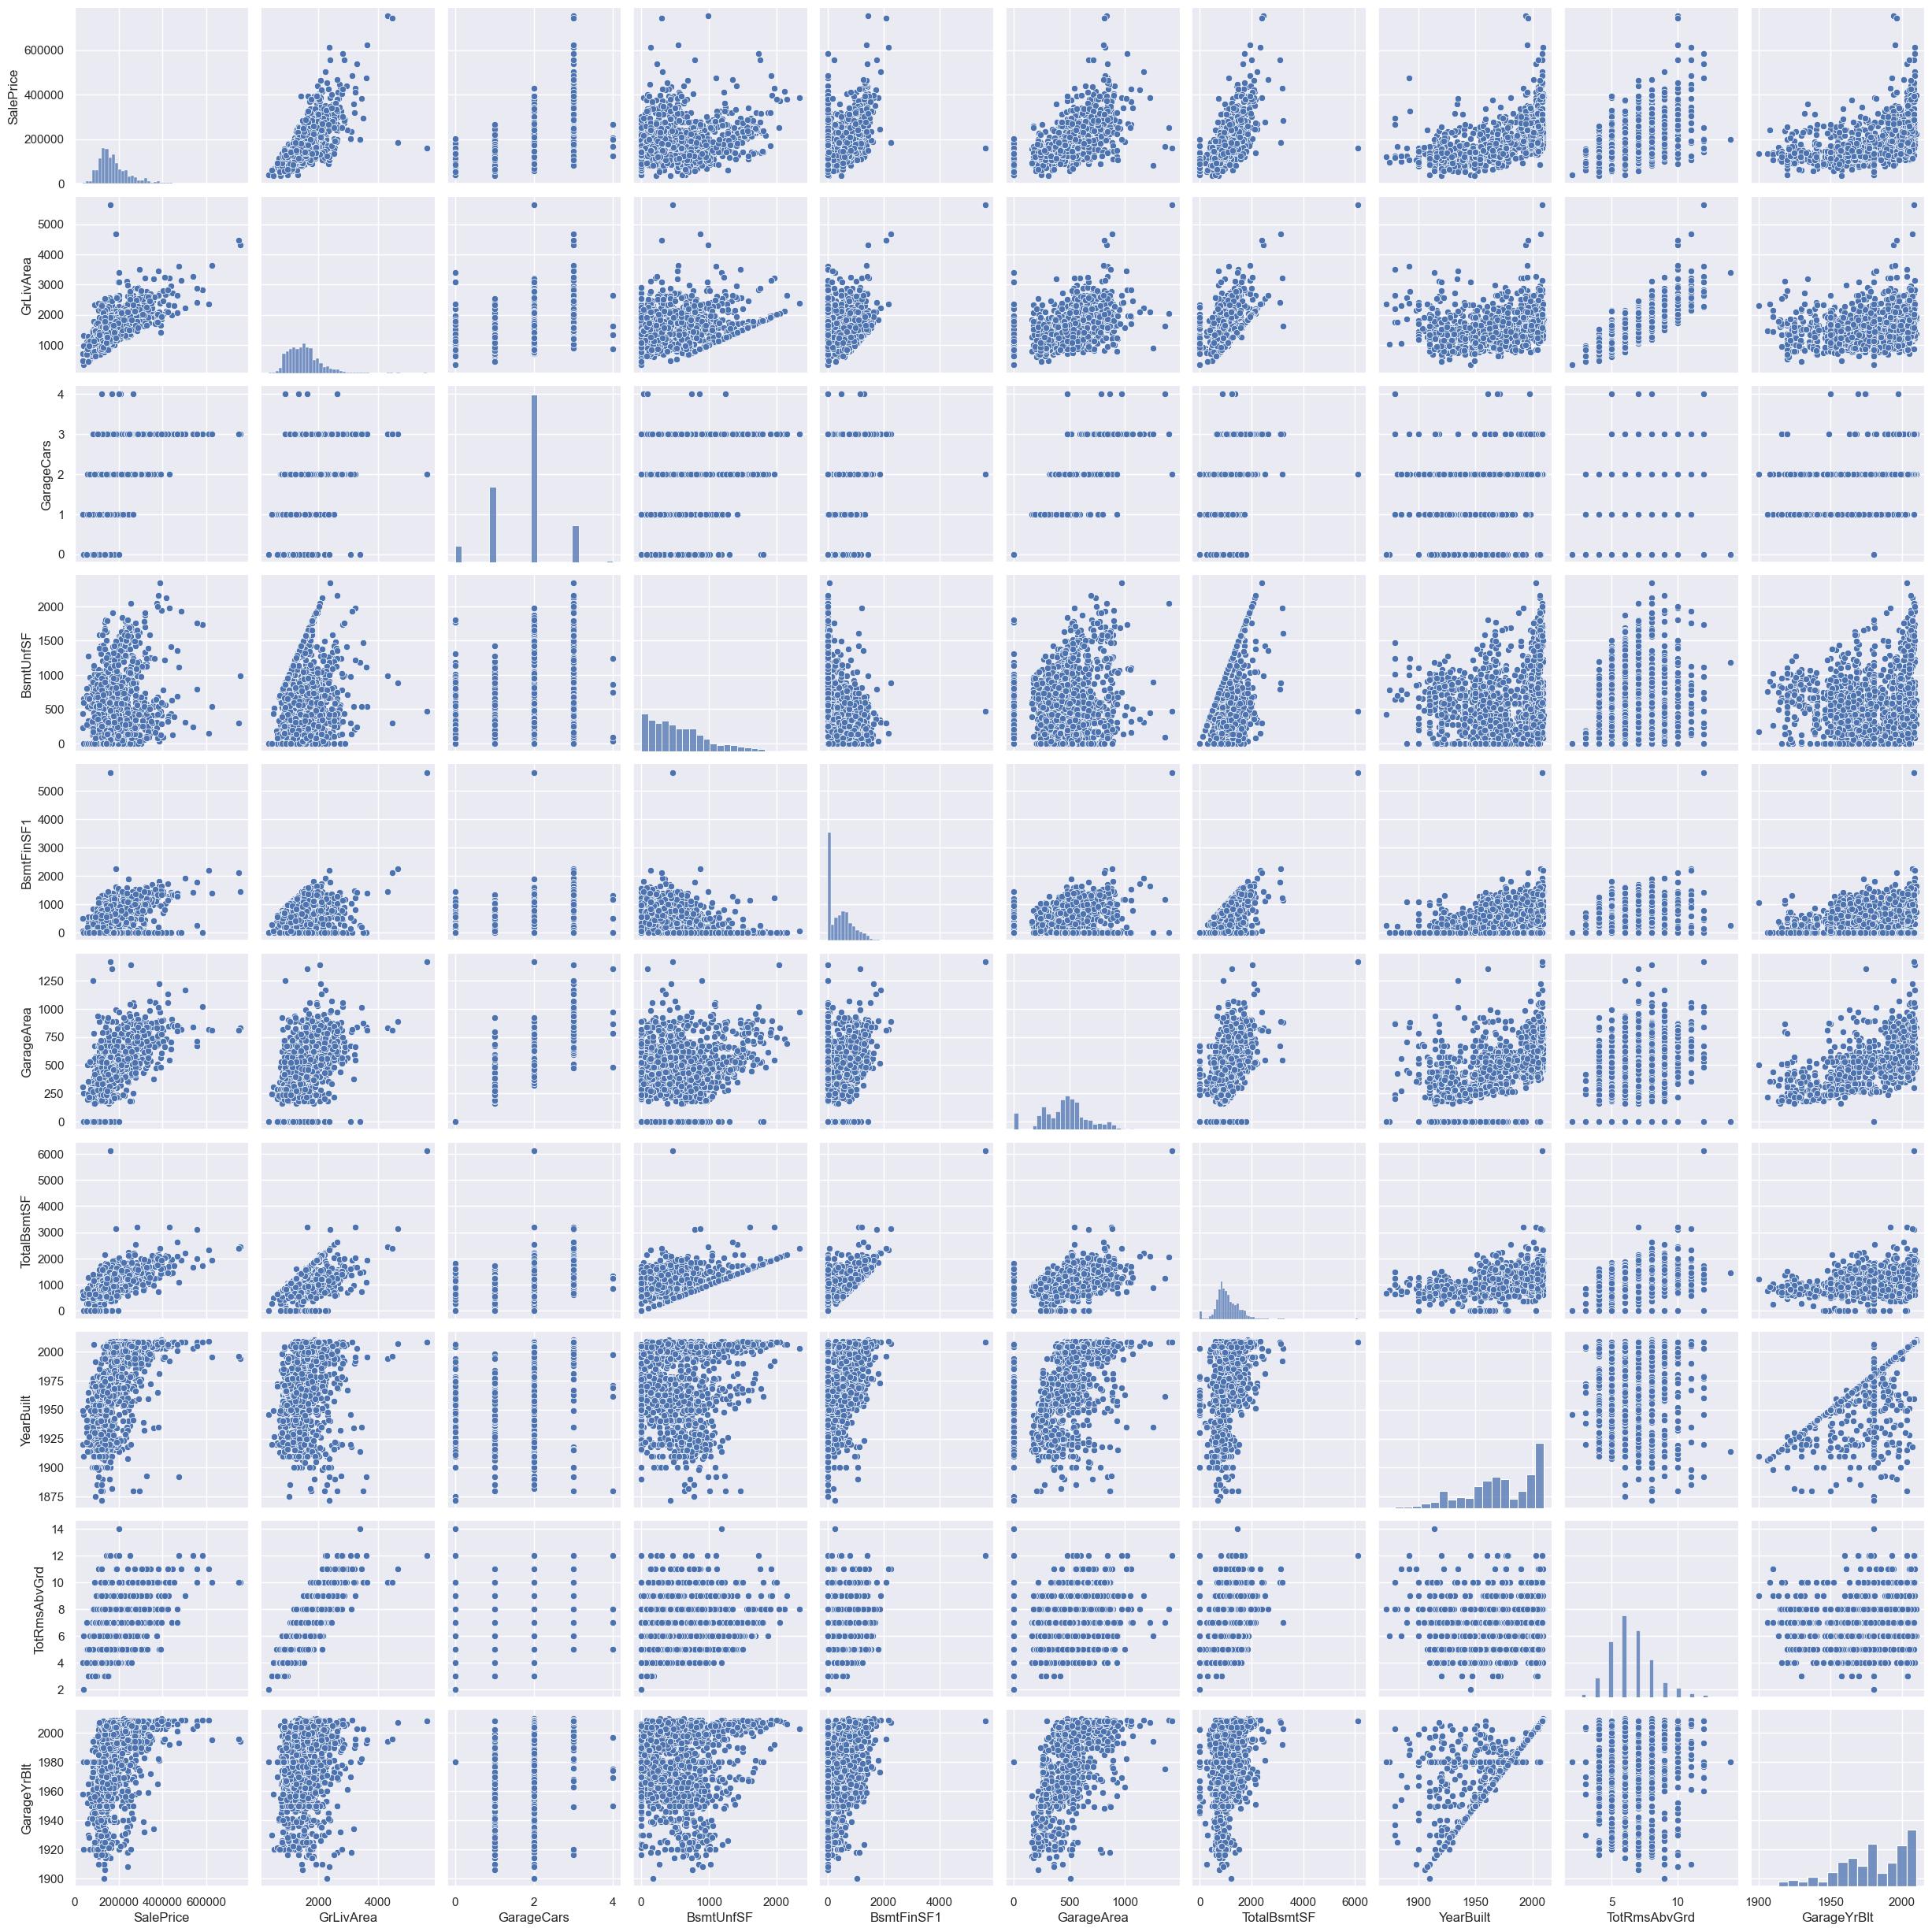

In [27]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [28]:
df.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370454 -0.139766     0.032936    -0.059134   
LotFrontage     -0.370454     1.000000  0.335967     0.239667    -0.043555   
LotArea         -0.139766     0.335967  1.000000     0.105786    -0.005665   
OverallQual      0.032936     0.239667  0.105786     1.000000    -0.092243   
OverallCond     -0.059134    -0.043555 -0.005665    -0.092243     1.000000   
YearBuilt        0.027435     0.120956  0.014296     0.573334    -0.375780   
YearRemodAdd     0.040199     0.084492  0.013852     0.551605     0.074158   
MasVnrArea       0.023792     0.195901  0.103302     0.407075    -0.125922   
BsmtFinSF1      -0.069501     0.232736  0.214121     0.239265    -0.046595   
BsmtFinSF2      -0.065549     0.052264  0.111158    -0.059291     0.040132   
BsmtUnfSF       -0.140627     0.119217 -0.002641     0.308018    -0.137008   
TotalBsmtSF     -0.238160     0.381480  0.260962     0.537523    -0.171796   
1stFlrSF        -0.251484     0.434368  0.299533     0.475933    -0.144646   
2ndFlrSF         0.307713     0.075641  0.051030     0.295969     0.029187   
LowQualFinSF     0.046524     0.031884  0.004773    -0.030502     0.025454   
GrLivArea        0.074949     0.385219  0.263109     0.593021    -0.079777   
BsmtFullBath     0.003799     0.107321  0.158147     0.110700    -0.055250   
BsmtHalfBath    -0.002243     0.006641  0.048034    -0.040291     0.117749   
FullBath         0.131354     0.186534  0.126100     0.551267    -0.193929   
HalfBath         0.177004     0.054113  0.014333     0.274328    -0.060371   
BedroomAbvGr    -0.023502     0.245222  0.119700     0.101789     0.013039   
KitchenAbvGr     0.281833    -0.005609 -0.017796    -0.184040    -0.087085   
TotRmsAbvGrd     0.040274     0.332606  0.190037     0.427720    -0.057485   
Fireplaces      -0.045232     0.249455  0.271398     0.396455    -0.024167   
GarageYrBlt      0.081000     0.062309 -0.025813     0.515236    -0.306031   
GarageCars      -0.040232     0.281378  0.154893     0.600991    -0.185670   
GarageArea      -0.098558     0.339130  0.180392     0.561980    -0.151662   
WoodDeckSF      -0.012598     0.088733  0.171701     0.239000    -0.003318   
OpenPorchSF     -0.005838     0.141819  0.084751     0.308554    -0.032847   
EnclosedPorch   -0.011904     0.008088 -0.018360    -0.114162     0.070238   
3SsnPorch       -0.043786     0.064665  0.020417     0.030314     0.025465   
ScreenPorch     -0.025932     0.041087  0.043147     0.064755     0.054721   
PoolArea         0.008309     0.174574  0.077669     0.065143    -0.002009   
MiscVal         -0.007651     0.005340  0.038063    -0.031461     0.068752   
MoSold          -0.013404     0.007413  0.001179     0.070570    -0.003685   
YrSold          -0.021461     0.004744 -0.014254    -0.027277     0.044003   
SalePrice       -0.084230     0.349895  0.263837     0.791069    -0.077924   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027435      0.040199    0.023792   -0.069501   -0.065549   
LotFrontage     0.120956      0.084492    0.195901    0.232736    0.052264   
LotArea         0.014296      0.013852    0.103302    0.214121    0.111158   
OverallQual     0.573334      0.551605    0.407075    0.239265   -0.059291   
OverallCond    -0.375780      0.074158   -0.125922   -0.046595    0.040132   
YearBuilt       1.000000      0.592512    0.312227    0.250465   -0.048903   
YearRemodAdd    0.592512      1.000000    0.177038    0.129259   -0.067575   
MasVnrArea      0.312227      0.177038    1.000000    0.260989   -0.071453   
BsmtFinSF1      0.250465      0.129259    0.260989    1.000000   -0.050328   
BsmtFinSF2     -0.048903     -0.067575   -0.071453   -0.050328    1.000000   
BsmtUnfSF       0.149444      0.181520    0.113719   -0.495718   -0.209395   
TotalBsmtSF     0.393159      0.292546    0.359798    0.521963    0.104593   
1stFlrSF        0.283056      0.2413

In [29]:
correlation_matrix = df.corr()
saleprice_correlation = correlation_matrix['SalePrice']

# Display correlations sorted in descending order
highest_correlations = saleprice_correlation.abs().sort_values(ascending=False)
print(highest_correlations)


SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
MasVnrArea       0.472606
GarageYrBlt      0.467120
Fireplaces       0.466968
BsmtFinSF1       0.386436
LotFrontage      0.349895
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
KitchenAbvGr     0.135935
EnclosedPorch    0.128627
ScreenPorch      0.111419
PoolArea         0.092397
MSSubClass       0.084230
OverallCond      0.077924
MoSold           0.046380
3SsnPorch        0.044571
YrSold           0.028907
LowQualFinSF     0.025620
MiscVal          0.021200
BsmtHalfBath     0.016873
BsmtFinSF2       0.011412
Name: SalePrice, dtype: float64


In [30]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# `Data Preparation`

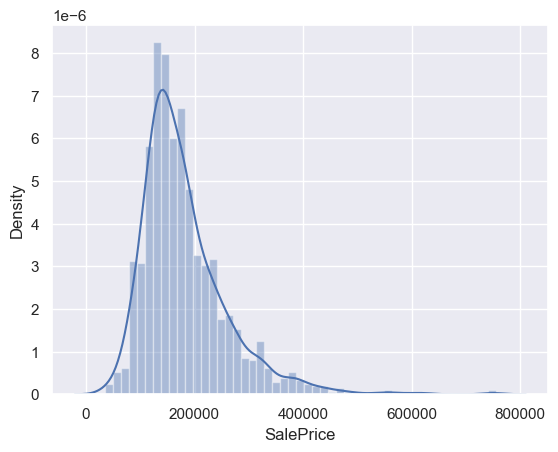

In [31]:
sns.distplot(df['SalePrice'])
plt.show()

Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

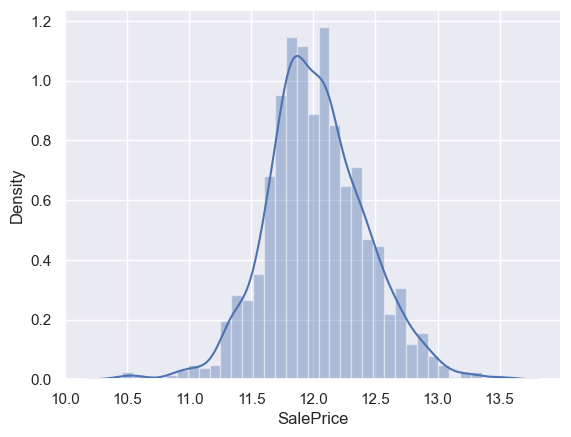

In [32]:
df['SalePrice']=np.log1p(df['SalePrice'])
sns.distplot(df['SalePrice'])
plt.show()

In [33]:
# Dumifying all columns using a loop
for col in categorical_columns:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(df[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    df = pd.concat([df, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    df.drop([col], axis = 1, inplace = True)

df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  ...  GarageType_none  \
0  12.247699            0            0            1  ...                0   
1  12.109016            0            0            1  ...                0   
2  12.317171            0            0            1  ...                0   
3  11.849405            0            0            1  ...                0   
4  12.429220            0            0            1  ...                0   

   GarageFinish_RFn  GarageFinish_Unf  GarageFinish_none  GarageQual_Fa  \
0                 1                 0                  0              0   
1                 1                 0                  0              0   
2                 1                 0                  0              0   
3                 0                 1                  0              0   
4                 1                 0                  0              0   

   GarageQual_Gd  GarageQual_Po  GarageQual_TA  GarageQual_none  \
0              0              0              1                0   
1              0              0              1                0   
2              0              0              1                0   
3              0              0              1                0   


# `Data Preparation for Modelling`

#### Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
#### Checking if outliers exist

In [34]:
from scipy import stats
z = np.abs(stats.zscore(df[numerical_columns]))
# Outlier Removed Records
selected = df[numerical_columns][(z < 3).all(axis=1)]
df = df.loc[selected.index]
df

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
2             60         68.0    11250            7            5       2001   
4             60         84.0    14260            8            5       2000   
6             20         75.0    10084            8            5       2004   
10            20         70.0    11200            5            5       1965   
...          ...          ...      ...          ...          ...        ...   
1452         180         35.0     3675            5            5       2005   
1453          20         90.0    17217            5            5       2006   
1454          20         62.0     7500            7            5       2004   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003       196.0         706           0        150   
2             2002       162.0         486           0        434   
4             2000       350.0         655           0        490   
6             2005       186.0        1369           0        317   
10            1965         0.0         906           0        134   
...            ...         ...         ...         ...        ...   
1452          2005        80.0         547           0          0   
1453          2006         0.0           0           0       1140   
1454          2005         0.0         410           0        811   
1455          2000         0.0           0           0        953   
1456          1988       119.0         790         163        589   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
2             920       920       866             0       1786             1   
4            1145      1145      1053             0       2198             1   
6            1686      1694         0             0       1694             1   
10           1040      1040         0             0       1040             1   
...           ...       ...       ...           ...        ...           ...   
1452          547      1072         0             0       1072             1   
1453         1140      1140         0             0       1140             0   
1454         1221      1221         0             0       1221             1   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
2                0         2         1             3             1   
4                0         2         1             4             1   
6                0         2         0             3             1   
10               0         1         0             3             1   
...            ...       ...       ...           ...           ...   
1452             0         1         0             2             1   
1453             0         1         0             3             1   
1454             0         2         0             2             1   
1455             0         2         1             3             1   
1456             0         2         0             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
2                6           1       2001.0           2         608   
4                9           1       2000.0           3         836   
6                7           1       2004.0           2         636   
10               5           0       1965.0           1         384   


# `Preparing Test and Train Set`

In [35]:
y = df['SalePrice']
X = df.drop("SalePrice", axis=1)

In [36]:
# split 70:30
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [37]:
# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [38]:
print(X_train.shape)
print(y_train.shape)


(711, 260)
(711,)


# `Performing RFE and Simple Linear Regression`

In [39]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [40]:
# Running RFE 
# Since there are more than 260 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select=100)           
rfe = rfe.fit(X_train, y_train)

In [41]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 115),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 69),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 44),
 ('BsmtHalfBath', True, 1),
 ('FullBath', False, 30),
 ('HalfBath', False, 141),
 ('BedroomAbvGr', False, 116),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 92),
 ('Fireplaces', False, 122),
 ('GarageYrBlt', False, 139),
 ('GarageCars', True, 1),
 ('GarageArea', False, 21),
 ('WoodDeckSF', False, 12),
 ('OpenPorchSF', False, 57),
 ('EnclosedPorch', False, 63),
 ('3SsnPorch', False, 124),
 ('ScreenPorch', False, 64),
 ('PoolArea', True, 1),
 ('MiscVal', False, 35),
 ('MoSold', False, 82),
 ('YrSold', False, 148),
 ('MSZoning_FV', True, 1)

In [42]:
# Select the top 100 variables
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'GarageCars', 'PoolArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Utilities_NoSeWa',
       'Neighborhood_Blueste', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_SawyerW', 'Neighborhood_Timber', 'Condition1_Norm',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMa

In [43]:
#this where the features not selected by RFE
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Family',
       'SaleCondition_Normal'],
      dtype='object', length=160)

In [44]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
X_train_rfe = pd.DataFrame(X_train[col])

In [46]:
X_train_rfe.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    0.166251 -0.111883    -0.060212    -0.516662   0.962089      0.814091   
1   -0.833362  0.202284    -0.811273    -0.516662  -0.477934     -1.200360   
2    0.166251  0.599484     0.690850    -0.516662   0.790658      0.622239   
3   -0.833362  1.396334     1.441911    -0.516662   0.927803      0.766128   
4   -0.833362  1.068011    -0.060212    -0.516662   0.756371      0.574276   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0    0.225381   -0.250949  -0.548479    -0.425966 -0.721488  1.309608   
1    1.015048   -0.250949  -1.027789    -0.084943 -0.347659 -0.799266   
2   -0.386366   -0.250949   0.745657     0.368839  0.149775  1.343780   
3    2.104495   -0.250949  -0.153049     2.148213  2.100319 -0.799266   
4    1.422067   -0.250949  -0.253704     1.262651  1.174791 -0.799266   

   LowQualFinSF  GrLivArea  BsmtHalfBath  KitchenAbvGr  GarageCars  PoolArea  \
0     -0.065094   0.691428           0.0           0.0    0.354343       0.0   
1     -0.065094  -1.031983           0.0           0.0    0.354343       0.0   
2     -0.065094   1.397095           0.0           0.0    0.354343       0.0   
3     -0.065094   0.859112           0.0           0.0    1.777722       0.0   
4     -0.065094   0.144129           0.0           0.0    0.354343       0.0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Utilities_NoSeWa  \
0     3.991061    -0.099716    -1.925775    -0.399837               0.0   
1    -0.250560    -0.099716     0.519271    -0.399837               0.0   
2    -0.250560    -0.099716     0.519271    -0.399837               0.0   
3    -0.250560    -0.099716     0.519271    -0.399837               0.0   
4    -0.250560    -0.099716     0.519271    -0.399837               0.0   

   Neighborhood_Blueste  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                   0.0             -0.373394             -0.156511   
1                   0.0             -0.373394             -0.156511   
2                   0.0              2.678136             -0.156511   
3                   0.0             -0.373394             -0.156511   
4                   0.0              2.678136             -0.156511   

   Neighborhood_Gilbert  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0             -0.269069             -0.119438             -0.186908   
1             -0.269069             -0.119438             -0.186908   
2             -0.269069             -0.119438             -0.186908   
3             -0.269069             -0.119438             -0.186908   
4             -0.269069             -0.119438             -0.186908   

   Neighborhood_SawyerW  Neighborhood_Timber  Condition1_Norm  \
0             -0.220619            -0.161165         0.348498   
1             -0.220619            -0.161165         0.348498   
2             -0.220619            -0.161165         0.348498   
3             -0.220619             6.204837         0.348498   
4             -0.220619            -0.161165         0.348498   

   Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  \
0         -0.065094         0.075218              0.0              0.0   
1         -0.065094         0.075218              0.0              0.0   
2         -0.065094         0.075218              0.0              0.0   
3         -0.065094         0.075218              0.0              0.0   
4         -0.065094         0.075218              0.0              0.0   

   Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  HouseStyle_1Story  ...  \
0              0.0              0.0        -0.037529          -1.015593  ...   
1              0.0              0.0        -0.037529           0.984647  ...   
2              0.0              0.0        -0.037529          -1.015593  ...   
3              0.0              0.0        -0.037529           0.984647  ...   
4              0.0              0.0        -0.037529           0.984647  

In [47]:
X_train_rfe.shape

(711, 100)

In [48]:
# predict
from sklearn import metrics
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9638559120011174

In [49]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-8.69376788328048e+19

### `Preprocessing for X_test`

In [50]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 115),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 69),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 44),
 ('BsmtHalfBath', True, 1),
 ('FullBath', False, 30),
 ('HalfBath', False, 141),
 ('BedroomAbvGr', False, 116),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 92),
 ('Fireplaces', False, 122),
 ('GarageYrBlt', False, 139),
 ('GarageCars', True, 1),
 ('GarageArea', False, 21),
 ('WoodDeckSF', False, 12),
 ('OpenPorchSF', False, 57),
 ('EnclosedPorch', False, 63),
 ('3SsnPorch', False, 124),
 ('ScreenPorch', False, 64),
 ('PoolArea', True, 1),
 ('MiscVal', False, 35),
 ('MoSold', False, 82),
 ('YrSold', False, 148),
 ('MSZoning_FV', True, 1)

In [51]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'GarageCars', 'PoolArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Utilities_NoSeWa',
       'Neighborhood_Blueste', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_SawyerW', 'Neighborhood_Timber', 'Condition1_Norm',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMa

In [52]:
X_test_rfe = X_test[col1]

In [53]:
X_test_rfe.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    0.362713 -0.613691    -0.106889     1.581610  -2.195020      0.954132   
1   -0.855652  0.045667    -0.106889    -0.576739   0.724331      0.509162   
2   -0.124633 -0.322946    -0.106889     1.581610  -1.983983     -1.814569   
3    2.555770 -1.948371    -0.106889    -0.576739   0.829850      0.657486   
4   -0.855652  1.598826     1.445541    -0.576739   0.865023      0.756368   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0   -1.100564   -0.238535   0.280399    -0.918123 -1.012003  0.652727   
1    1.902071   -0.238535  -0.646400     1.252104  1.166176 -0.775667   
2   -1.100564   -0.238535  -0.554864    -1.914516 -0.220487  0.134873   
3   -0.154734   -0.238535  -0.419849    -0.721574 -1.024087  1.197578   
4   -1.100564   -0.238535   2.726691     2.000081  2.051344 -0.775667   

   LowQualFinSF  GrLivArea  BsmtHalfBath  KitchenAbvGr  GarageCars  PoolArea  \
0     -0.057354  -0.156126           0.0           0.0   -2.432034       0.0   
1     -0.057354   0.157465           0.0           0.0    0.305126       0.0   
2     -0.057354  -0.041067           0.0           0.0   -2.432034       0.0   
3     -0.057354   0.335693           0.0           0.0    0.305126       0.0   
4     -0.057354   0.818487           0.0           0.0    1.673706       0.0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Utilities_NoSeWa  \
0    -0.250435    -0.081244    -1.849403     2.285714               0.0   
1    -0.250435    -0.081244     0.540715    -0.437500               0.0   
2    -0.250435    -0.081244    -1.849403     2.285714               0.0   
3     3.993050    -0.081244    -1.849403    -0.437500               0.0   
4    -0.250435    -0.081244     0.540715    -0.437500               0.0   

   Neighborhood_Blueste  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0             -0.057354             -0.448093             -0.184115   
1             -0.057354              2.231679             -0.184115   
2             -0.057354             -0.448093             -0.184115   
3             -0.057354             -0.448093             -0.184115   
4             -0.057354              2.231679             -0.184115   

   Neighborhood_Gilbert  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0             -0.257747             -0.129099             -0.164122   
1             -0.257747             -0.129099             -0.164122   
2             -0.257747             -0.129099             -0.164122   
3             -0.257747             -0.129099             -0.164122   
4             -0.257747             -0.129099             -0.164122   

   Neighborhood_SawyerW  Neighborhood_Timber  Condition1_Norm  \
0             -0.174371            -0.174371         0.377256   
1             -0.174371            -0.174371         0.377256   
2             -0.174371            -0.174371        -2.650720   
3             -0.174371            -0.174371         0.377256   
4             -0.174371            -0.174371         0.377256   

   Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  \
0               0.0              0.0              0.0              0.0   
1               0.0              0.0              0.0              0.0   
2               0.0              0.0              0.0              0.0   
3               0.0              0.0              0.0              0.0   
4               0.0              0.0              0.0              0.0   

   Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  HouseStyle_1Story  ...  \
0              0.0              0.0              0.0          -1.043571  ...   
1              0.0              0.0              0.0           0.958248  ...   
2              0.0              0.0              0.0          -1.043571  ...   
3              0.0              0.0              0.0          -1.043571  ...   
4              0.0              0.0              0.0           0.958248  

# `Performing Lasso and Ridge Regression`
Let's now try predicting house prices and perform lasso and ridge regression.

## Lasso Regression

In [54]:
# Checking the dimension of X_train & y_train
print("X_train", X_train_rfe.shape)
print("y_train", y_train.shape)

X_train (711, 100)
y_train (711,)


In [55]:
# Applying Lasso
from sklearn.linear_model import Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# cv_results
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.162287      0.015719         0.002765        0.000973      0.0001   
1        0.035204      0.004512         0.001931        0.000956       0.001   
2        0.008266      0.003410         0.001798        0.000787        0.01   
3        0.005068      0.001876         0.001406        0.000616        0.05   
4        0.004692      0.001966         0.001665        0.001039         0.1   
5        0.003982      0.001615         0.002689        0.002075         0.2   
6        0.004658      0.001491         0.002539        0.001083         0.3   
7        0.003713      0.003095         0.001554        0.000577         0.4   
8        0.003308      0.001703         0.001468        0.000519         0.5   
9        0.002394      0.001294         0.001777        0.001098         0.6   
10       0.002936      0.001445         0.001828        0.001001         0.7   
11       0.002449      0.001283         0.001613        0.000918         0.8   
12       0.002548      0.001446         0.002002        0.001124         0.9   
13       0.003011      0.001392         0.001743        0.000864         1.0   
14       0.002682      0.001590         0.001606        0.001048         2.0   
15       0.002749      0.001146         0.002001        0.001136         3.0   
16       0.002630      0.001615         0.001207        0.000176         4.0   
17       0.002823      0.001375         0.002172        0.001366         5.0   
18       0.003113      0.001567         0.001981        0.001641         6.0   
19       0.002522      0.001476         0.001631        0.001061         7.0   
20       0.004105      0.002884         0.001820        0.000964         8.0   
21       0.002602      0.001648         0.001620        0.001105         9.0   
22       0.002619      0.001175         0.002673        0.001953        10.0   
23       0.002619      0.001562         0.001583        0.000896          20   
24       0.003148      0.001565         0.001775        0.000338          50   
25       0.003535      0.002835         0.001765        0.000981         100   
26       0.003219      0.001584         0.001987        0.000949         500   
27       0.004525      0.003387         0.001809        0.001018        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.081380          -0.092431   
1    {'alpha': 0.001}          -0.072036          -0.085657   
2     {'alpha': 0.01}          -0.077703          -0.081401   
3     {'alpha': 0.05}          -0.114884          -0.102987   
4      {'alpha': 0.1}          -0.155685          -0.140342   
5      {'alpha': 0.2}          -0.237719          -0.219575   
6      {'alpha': 0.3}          -0.300786          -0.294656   
7      {'alpha': 0.4}          -0.305318          -0.294656   
8      {'alpha': 0.5}          -0.305318          -0.294656   
9      {'alpha': 0.6}          -0.305318          -0.294656   
10     {'alpha': 0.7}          -0.305318          -0.294656   
11     {'alpha': 0.8}          -0.305318          -0.294656   
12     {'alpha': 0.9}          -0.305318          -0.294656   
13     {'alpha': 1.0}          -0.305318          -0.294656   
14     {'alpha': 2.0}          -0.305318          -0.294656   
15     {'alpha': 3.0}          -0.305318          -0.294656   
16     {'alpha': 4.0}          -0.305318          -0.294656   
17     {'alpha': 5.0}          -0.305318          -0.294656   
18     {'alpha': 6.0}          -0.305318          -0.294656   
19     {'alpha': 7.0}          -0.305318          -0.294656   
20     {'alpha': 8.0}          -0.305318          -0.294656   
21     {'alpha': 9.0}          -0.305318          -0.294656   
22    {'alpha': 10.0}          -0.305318          -0.294656   
23      {'alpha': 20}          -0.305318          -0.294656   
24      {'alpha': 50}          -0.305318          -0.294656   
25     {'alpha': 100}          -0.305318     

In [57]:
lasso_best_alpha = lasso_cv_results.loc[lasso_cv_results['rank_test_score'] == 1, 'param_alpha'].values[0]
print("Best Alpha for lasso:", lasso_best_alpha)

Best Alpha for lasso: 0.001


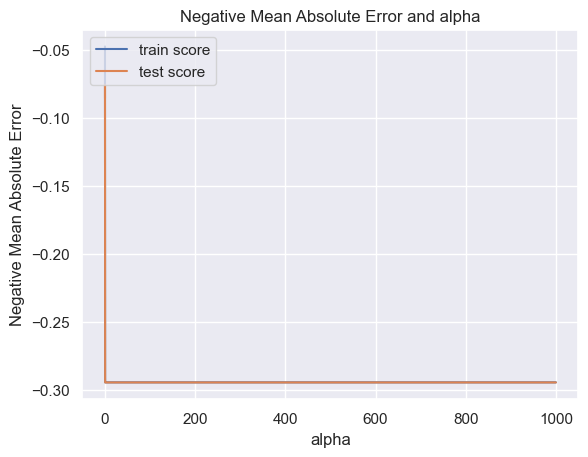

In [58]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.3 and stabilises thereafter,
but we will choose a low value of alpha to balance the trade-off between Bias-Variance
and to get the coefficients of smallest of features.
1


In [59]:
# At alpha = 0.001, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
#lasso.coef_

Lasso(alpha=0.001)

In [60]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.001),
 ('MSSubClass', -0.027),
 ('LotFrontage', 0.0),
 ('LotArea', 0.01),
 ('OverallQual', 0.056),
 ('OverallCond', 0.038),
 ('YearBuilt', 0.079),
 ('YearRemodAdd', 0.015),
 ('MasVnrArea', -0.001),
 ('BsmtFinSF1', 0.033),
 ('BsmtFinSF2', 0.004),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.036),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.001),
 ('GrLivArea', 0.122),
 ('BsmtFullBath', 0.007),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.007),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.007),
 ('Fireplaces', 0.0),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.012),
 ('GarageArea', 0.018),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.007),
 ('EnclosedPorch', 0.003),
 ('3SsnPorch', -0.001),
 ('ScreenPorch', 0.007),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.004),
 ('YrSold', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.002),
 ('MSZoning_RL', 0.005),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.002),
 ('Alley_Pave'

In [61]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print("lasso train score:", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print("lasso test score:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

lasso train score: 0.9585955573753392
lasso test score: 0.9193196525138927


In [62]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.10199728300229385


In [63]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [64]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  12.001
1   MSSubClass  -0.027
2  LotFrontage   0.000
3      LotArea   0.010
4  OverallQual   0.056

In [65]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0                constant  12.001
16              GrLivArea   0.122
6               YearBuilt   0.079
4             OverallQual   0.056
5             OverallCond   0.038
..                    ...     ...
215      FireplaceQu_none  -0.013
120   Exterior1st_BrkComm  -0.015
66   Neighborhood_MeadowV  -0.016
257  SaleCondition_Alloca  -0.020
1              MSSubClass  -0.027

[261 rows x 2 columns]

In [66]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred.head(6)

Variable   Coeff
0      constant  12.001
16    GrLivArea   0.122
6     YearBuilt   0.079
4   OverallQual   0.056
5   OverallCond   0.038
12  TotalBsmtSF   0.036

In [67]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'Functional_Typ', 'SaleCondition_Partial', 'Neighborhood_Crawfor', 'SaleCondition_Normal', 'GarageArea', 'Neighborhood_NridgHt', 'Condition1_Norm', 'Neighborhood_StoneBr', 'YearRemodAdd', 'Neighborhood_Somerst', 'WoodDeckSF', 'BsmtCond_TA', 'GarageCars', 'BsmtExposure_Gd', 'SaleType_CWD', 'GarageQual_TA', 'LotArea', 'Functional_Min2', 'Exterior1st_BrkFace', 'HeatingQC_Fa', 'Neighborhood_BrkSide', 'BsmtFinType1_GLQ', 'ExterCond_TA', 'RoofMatl_Tar&Grv', 'OpenPorchSF', 'BsmtFullBath', 'FullBath', 'SaleCondition_Family', 'CentralAir_Y', 'ScreenPorch', 'TotRmsAbvGrd', 'BsmtQual_Fa', 'LotShape_IR2', 'MSZoning_RL', 'Foundation_Slab', 'BsmtFinSF2', 'BsmtCond_Gd', 'Neighborhood_ClearCr', 'Condition1_PosN', 'Foundation_PConc', 'FireplaceQu_Po', 'MoSold', 'SaleType_Oth', 'Alley_Pave', 'Exterior1st_ImStucc', 'FireplaceQu_Gd', 'EnclosedPorch', 'Functional_Min1', 'PavedDrive_Y', 'HouseStyle_1.5Unf', 'Sa

In [68]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  BsmtFinSF1  \
0   0.691428    -0.060212    -0.516662    -0.425966    1.079321    0.225381   
1  -1.031983    -0.811273    -0.516662    -0.084943    0.555532    1.015048   
2   1.397095     0.690850    -0.516662     0.368839    0.394765   -0.386366   
3   0.859112     1.441911    -0.516662     2.148213    1.556436    2.104495   
4   0.144129    -0.060212    -0.516662     1.262651    0.223626    1.422067   

   Fireplaces   LotArea  LotFrontage  BsmtFullBath  Foundation_PConc  \
0   -0.950701 -0.111883    -0.198383     -0.813151          1.001407   
1   -0.950701  0.202284     0.174273      1.229784         -0.998595   
2    0.791434  0.599484     0.387220     -0.813151          1.001407   
3    0.791434  1.396334     0.919587      1.229784          1.001407   
4    0.791434  1.068011     0.387220      1.229784          1.001407   

   OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
0     0.290704  0.853800    -0.215122    1.142205  
1    -0.786411 -1.073348    -0.215122   -0.818444  
2     0.829262  0.853800    -0.215122    0.924356  
3     0.713856  0.853800    -0.215122    1.632368  
4    -0.036277  0.853800    -0.215122    0.452347

In [69]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  BsmtFinSF1  \
0  -0.156126    -0.106889     1.581610    -0.918123   -2.237452   -1.100564   
1   0.157465    -0.106889    -0.576739     1.252104    0.482248    1.902071   
2  -0.041067    -0.106889     1.581610    -1.914516   -2.237452   -1.100564   
3   0.335693    -0.106889    -0.576739    -0.721574   -0.159903   -0.154734   
4   0.818487     1.445541    -0.576739     2.000081    1.294381   -1.100564   

   Fireplaces   LotArea  LotFrontage  BsmtFullBath  Foundation_PConc  \
0   -0.889660 -0.613691    -0.364197     -0.879350          0.970915   
1   -0.889660  0.045667     0.636051      1.137204          0.970915   
2   -0.889660 -0.322946    -0.364197     -0.879350         -1.029957   
3   -0.889660 -1.948371     0.346505     -0.879350          0.970915   
4    0.697161  1.598826     0.162249     -0.879350          0.970915   

   OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
0    -0.809465 -1.072848    -0.190024    0.518379  
1    -0.339602  0.863357    -0.190024    0.839365  
2     1.696471 -1.072848    -0.190024   -0.845811  
3    -0.252591  0.863357    -0.190024   -0.845811  
4     1.800885  0.863357    -0.190024    1.140289

# `Ridge Regression`

In [70]:
from sklearn.linear_model import Ridge

In [71]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.008473      0.007199         0.001859        0.000932      0.0001   
1        0.007076      0.004317         0.002095        0.001046       0.001   
2        0.004359      0.001692         0.001518        0.000830        0.01   
3        0.004288      0.001654         0.002474        0.001464        0.05   
4        0.002980      0.000227         0.001792        0.001359         0.1   
5        0.005423      0.001948         0.002143        0.001273         0.2   
6        0.003816      0.001116         0.002107        0.001234         0.3   
7        0.004498      0.001546         0.001944        0.001099         0.4   
8        0.006151      0.002745         0.001831        0.001014         0.5   
9        0.003507      0.000864         0.002593        0.002288         0.6   
10       0.005168      0.002084         0.001645        0.000929         0.7   
11       0.005451      0.002820         0.001974        0.001117         0.8   
12       0.005520      0.002109         0.001175        0.000165         0.9   
13       0.005328      0.001974         0.001944        0.001552         1.0   
14       0.010601      0.008382         0.003106        0.001700         2.0   
15       0.003834      0.001248         0.001783        0.000871         3.0   
16       0.005627      0.002001         0.002573        0.001699         4.0   
17       0.005896      0.002032         0.002223        0.001104         5.0   
18       0.004051      0.001475         0.001951        0.000870         6.0   
19       0.004977      0.002137         0.001804        0.001060         7.0   
20       0.007407      0.003799         0.002426        0.001992         8.0   
21       0.005782      0.001804         0.003010        0.001699         9.0   
22       0.008173      0.004984         0.002133        0.001323        10.0   
23       0.004810      0.002058         0.002035        0.000968          20   
24       0.006201      0.002312         0.001502        0.000762          50   
25       0.004696      0.001195         0.001584        0.000975         100   
26       0.004125      0.001460         0.001339        0.000523         500   
27       0.005900      0.003102         0.001560        0.000930        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.083613          -0.095262   
1    {'alpha': 0.001}          -0.083614          -0.095259   
2     {'alpha': 0.01}          -0.083620          -0.095228   
3     {'alpha': 0.05}          -0.083639          -0.095108   
4      {'alpha': 0.1}          -0.083644          -0.094992   
5      {'alpha': 0.2}          -0.083616          -0.094783   
6      {'alpha': 0.3}          -0.083556          -0.094601   
7      {'alpha': 0.4}          -0.083478          -0.094458   
8      {'alpha': 0.5}          -0.083397          -0.094349   
9      {'alpha': 0.6}          -0.083311          -0.094245   
10     {'alpha': 0.7}          -0.083223          -0.094146   
11     {'alpha': 0.8}          -0.083149          -0.094051   
12     {'alpha': 0.9}          -0.083075          -0.093959   
13     {'alpha': 1.0}          -0.082999          -0.093871   
14     {'alpha': 2.0}          -0.082242          -0.093208   
15     {'alpha': 3.0}          -0.081552          -0.092881   
16     {'alpha': 4.0}          -0.080937          -0.092600   
17     {'alpha': 5.0}          -0.080412          -0.092285   
18     {'alpha': 6.0}          -0.079961          -0.091956   
19     {'alpha': 7.0}          -0.079567          -0.091625   
20     {'alpha': 8.0}          -0.079231          -0.091298   
21     {'alpha': 9.0}          -0.078959          -0.090979   
22    {'alpha': 10.0}          -0.078701          -0.090668   
23      {'alpha': 20}          -0.076975          -0.088327   
24      {'alpha': 50}          -0.075219          -0.085938   
25     {'alpha': 100}          -0.075648     

In [73]:
ridge_best_alpha = ridge_cv_results.loc[ridge_cv_results['rank_test_score'] == 1, 'param_alpha'].values[0]
print("Best Alpha for Ridge:", ridge_best_alpha)

Best Alpha for Ridge: 100


In [74]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#ridge.coef_

Ridge(alpha=100)

In [75]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.001),
 ('MSSubClass', -0.013),
 ('LotFrontage', 0.005),
 ('LotArea', 0.011),
 ('OverallQual', 0.045),
 ('OverallCond', 0.028),
 ('YearBuilt', 0.031),
 ('YearRemodAdd', 0.018),
 ('MasVnrArea', -0.001),
 ('BsmtFinSF1', 0.027),
 ('BsmtFinSF2', 0.004),
 ('BsmtUnfSF', 0.003),
 ('TotalBsmtSF', 0.034),
 ('1stFlrSF', 0.029),
 ('2ndFlrSF', 0.024),
 ('LowQualFinSF', -0.002),
 ('GrLivArea', 0.046),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.018),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', 0.006),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.017),
 ('Fireplaces', 0.006),
 ('GarageYrBlt', 0.003),
 ('GarageCars', 0.014),
 ('GarageArea', 0.019),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.01),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', -0.003),
 ('ScreenPorch', 0.007),
 ('PoolArea', 0.0),
 ('MiscVal', -0.001),
 ('MoSold', 0.005),
 ('YrSold', -0.001),
 ('MSZoning_FV', 0.005),
 ('MSZoning_RH', 0.003),
 ('MSZoning_RL', 0.007),
 ('MSZoning_RM', 0.0),
 ('Street_Pave', 0.001),

In [76]:
# ridge regression
lm = Ridge(alpha=100)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9552401345660304
0.9208424176988117


In [77]:
print('Ridge RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Ridge RMSE : 0.10103014673676615


it is visible that the model performance is better than Lasso. The train and the test scores are matching well

In [78]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [79]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                constant  12.001
16              GrLivArea   0.046
4             OverallQual   0.045
12            TotalBsmtSF   0.034
6               YearBuilt   0.031
13               1stFlrSF   0.029
5             OverallCond   0.028
9              BsmtFinSF1   0.027
14               2ndFlrSF   0.024
27             GarageArea   0.019
62   Neighborhood_Crawfor   0.019
7            YearRemodAdd   0.018
19               FullBath   0.018
23           TotRmsAbvGrd   0.017
259  SaleCondition_Normal   0.016
210        Functional_Typ   0.016
78   Neighborhood_StoneBr   0.015
72   Neighborhood_NridgHt   0.015
82        Condition1_Norm   0.015
28             WoodDeckSF   0.014

In [80]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                constant  12.001
16              GrLivArea   0.046
4             OverallQual   0.045
12            TotalBsmtSF   0.034
6               YearBuilt   0.031
..                    ...     ...
204        KitchenQual_TA  -0.012
1              MSSubClass  -0.013
205       Functional_Maj2  -0.015
66   Neighborhood_MeadowV  -0.017
257  SaleCondition_Alloca  -0.017

[261 rows x 2 columns]

In [81]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE.head(6)

Variable   Coeff
0      constant  12.001
16    GrLivArea   0.046
4   OverallQual   0.045
12  TotalBsmtSF   0.034
6     YearBuilt   0.031
13     1stFlrSF   0.029

`Observation:`

Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
It is always advisable to use simple yet robust model.




# `Subjective Questions - Demonstration/Validation`

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


Ans: The Optimal value of alpha for ridge is 100 and for lasso it is 0.001.

### Building Ridge Model by doubling the value of alpha to 200

In [82]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
ridge_double = Ridge(alpha=200,random_state=100)
ridge_double.fit(X_train,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(5)

The R2 Score of the model on the test dataset for doubled alpha is 0.920231860337209
The MSE of the model on the test dataset for doubled alpha is 0.010285819764144194
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
OverallQual                          0.040513
GrLivArea                            0.039590
TotalBsmtSF                          0.030539
1stFlrSF                             0.027473
BsmtFinSF1                           0.023959

In [83]:
ridge_double

Ridge(alpha=200, random_state=100)

In [84]:
# Building Lasso Model by doubling the value of alpha to 0.001
lasso_double = Lasso(alpha=0.001,random_state=100)
lasso_double.fit(X_train,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(5)

The R2 Score of the model on the test dataset for doubled alpha is 0.9193196525138927
The MSE of the model on the test dataset for doubled alpha is 0.010403445739850024
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
GrLivArea                            0.122116
YearBuilt                            0.079026
OverallQual                          0.056099
OverallCond                          0.038467
TotalBsmtSF                          0.036380

3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [85]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe = X_test.drop(['GrLivArea','YearBuilt','OverallQual','OverallCond','TotalBsmtSF'],axis=1)
X_train_rfe = X_train.drop(['GrLivArea','YearBuilt','OverallQual','OverallCond','TotalBsmtSF'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.001,random_state=100)
lasso3.fit(X_train_rfe,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.910395160483569
The MSE of the model on the test dataset is 0.011554227454184898
The most important predictor variables are as follows:


Lasso Co-Efficient
2ndFlrSF                0.115959
1stFlrSF                0.090752
BsmtFinSF1              0.082599
BsmtUnfSF               0.048117
YearRemodAdd            0.043341

<a id="1"></a>
# <p style="padding:10px;background-color:blue;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">"Surprise Housing" House Price Prediction - Advanced regression</p>

# `Objective:`

The primary objective is to create a robust regression model that accurately predicts house prices based on independent variables. This model will assist the management in understanding the dynamics of pricing in the Australian market. Insights derived from the model can guide strategic decisions, helping the company focus on areas with high return potential and adapt its business strategy accordingly.


`Data Exploration:`

The project began with importing necessary libraries and loading the dataset. The dataset contains 1460 rows and 81 columns, comprising both categorical and numeric variables. The initial data inspection revealed missing values, requiring imputation strategies.

Outliers in numeric columns were identified using descriptive statistics and addressed appropriately. For example, the "LotFrontage" variable was imputed based on the median value within the corresponding neighborhood.

`Univariate Analysis:`

Various univariate analyses were performed to understand the distribution of key variables. Histograms, box plots, and count plots were used to visualize the distribution of sale prices, overall quality ratings, zoning classifications, living area above ground, heating quality, and garage finish types.

`Bivariate Analysis:`

Scatter plots, box plots, violin plots, and pair plots were employed for bivariate analysis. Relationships between variables like living area and sale prices, overall quality and sale prices, zoning classifications and sale prices, and others were explored.

`Multivariate Analysis:`

A 3D scatter plot was created to visualize the interaction between living area, overall quality, and sale prices. A heatmap displayed correlations between numeric variables, providing insights into variable relationships.

## `Data Preparation:`

Data preparation involved handling missing values, transforming skewed sale prices using log transformation, and creating dummy variables for categorical features. Outliers, defined as records with more than +3 or < -3 standard deviations, were removed to enhance model performance.

`Modeling:`

The dataset was split into training and testing sets, scaled, and subjected to Simple Linear Regression using Recursive Feature Elimination (RFE) with 100 features. Lasso and Ridge Regression were employed for predictive modeling.

### `Lasso Regression:`

Lasso Regression was performed with hyperparameter tuning. A low value of alpha (0.001) was chosen to balance the bias-variance trade-off. The model showed a high R2 score of 0.955 (train) and 0.919 on the test (test), and root mean square error (RMSE) was 0.101.


### `Ridge Regression:`

Ridge Regression with alpha value 100 demonstrated a good balance between bias and variance, resulting in R2 scores of 0.955 (train) and 0.920 (test), with an RMSE of 0.101.





# `Recommendations:`

Surprise Housing can utilize the developed model to make informed decisions on factors influencing house price predction. The company should focus on variables such as zoning classifications, sale conditions, year built, living area, and others identified by the model.

Based on the results of the Lasso Regression model, which assigns non-zero coefficients to the most influential features, the top 5 factors influencing the Surprise Housing System are as follows:

### `1. GrLivArea (Above Ground Living Area):`


### `2. YearBuilt (Year the property was built):`


### `3. OverallQual (Overall Quality):`


### `4. OverallCond (Overall Condition):`


### `5. TotalBsmtSF (Total Basement Area):`



## `Conclusion:`

Both Lasso and Ridge Regression models displayed satisfactory predictive performance. However, Lasso Regression, with its ability to assign zero coefficients to insignificant features, was chosen for its simplicity and interpretability. The model provided valuable insights into the factors influencing 

These factors provide valuable insights for Surprise Housing to strategically plan their operations, marketing, and service offerings. Understanding the specific characteristics of areas, sale conditions, and property features that influence rentels can help the company optimize its resources and enhance customer satisfaction.


<a id="1"></a>
# <p style="padding:10px;background-color:purple;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>